In [ ]:
# Лабораторная работа № 7
### вариант № 2   Лила.В.Я
### группа: РИМ-101211                

In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

In [2]:
def SSA_modes(F, L):
    N = len(F)
    K = N - L + 1
    X = np.empty((L, K))
    
    i=0
    while i<L:           # Заполнение данной матрицы точками массива
        X[i] = F[i:K+i]
        i+=1
        
    S = np.dot(X, X.T)
    U, A, _ = np.linalg.svd(S)
    V = np.dot(X.T, U)
    
    return A,U,V

In [3]:
ts = np.array([3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3]) # мини временной ряд
A, U, V = SSA_modes(ts, 3) # его разложение с длиной окна = 3
print('A =', A) # собственные числа
print('U =', U) # собственные вектора
print('V =', V) # траекторные вектора

A = [129.66842566  12.           3.33157434]
U = [[-5.78869570e-01  7.07106781e-01  4.06091149e-01]
 [-5.74299610e-01  3.21388603e-16 -8.18645196e-01]
 [-5.78869570e-01 -7.07106781e-01  4.06091149e-01]]
V = [[-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00 -6.66133815e-16  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  0.00000000e+00 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00 -6.66133815e-16  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  0.00000000e+00 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00 -6.66133815e-16  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]]


In [15]:
def SSA_group(A, U, V, N, I):
    L = len(A)
    K = N - L + 1
    V = V.transpose()
    Z = np.dot(U[:, I], V[I, :])
    G = np.zeros(N)
    L1 = min(L,K)
    K1 = max(L,K)

    for k in range(0, L1-1):
        C=0
        for m in range(0,k+1):
            C = C+Z[m][k-m]
        G[k]=C/(k+1)
        
    for k in range(L1-1, K1):
        C=0
        for m in range(0,L1):
            C = C+Z[m][k-m]
        G[k] = C/L1
        
    for k in range(K1,N):
        C=0
        for m in range(k-K1+1,N-K1+1):
            C = C+Z[m][k-m]
        G[k] = C/(N-k)
    
    return G

In [5]:
ts1 = SSA_group(A, U, V, len(ts), [0, 1, 2])
print(ts1)

[3. 2. 1. 2. 3. 2. 1. 2. 3. 2. 1. 2. 3.]


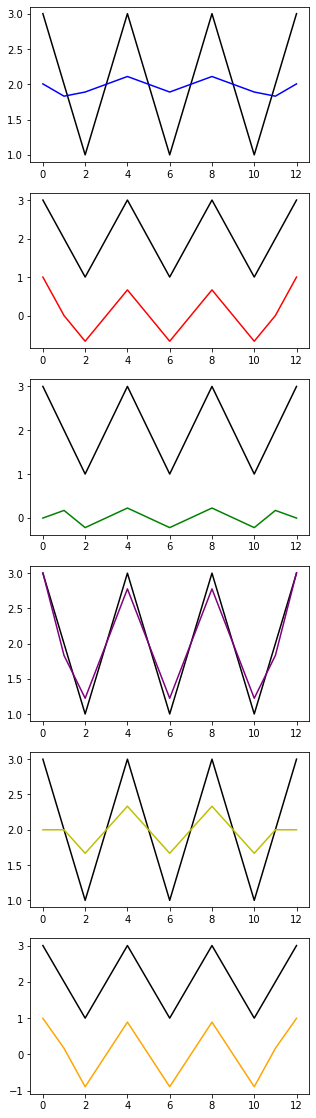

In [6]:
plt.figure(figsize = (5, 20))

ts1_0 = SSA_group(A, U, V, len(ts), [0])
plt.subplot(6,1,1)
plt.plot(ts, 'k')
plt.plot(ts1_0, 'b')
 
ts1_1 = SSA_group(A, U, V, len(ts), [1])
plt.subplot(6,1,2)
plt.plot(ts, 'k')
plt.plot(ts1_1, 'r')
 
ts1_2 = SSA_group(A, U, V, len(ts), [2])
plt.subplot(6,1,3)
plt.plot(ts, 'k')
plt.plot(ts1_2, 'g')
 

ts1_01 = SSA_group(A, U, V, len(ts), [0, 1])
plt.subplot(6,1,4)
plt.plot(ts, 'k')
plt.plot(ts1_01, 'purple')
 

ts1_02 = SSA_group(A, U, V, len(ts), [0, 2])
plt.subplot(6,1,5)
plt.plot(ts, 'k')
plt.plot(ts1_02, 'y')
 

ts1_12 = SSA_group(A, U, V, len(ts), [1, 2])
plt.subplot(6,1,6)
plt.plot(ts, 'k')
plt.plot(ts1_12, 'orange')

plt.show()

Отметим характерные особенности полученных компонент.
1. 0-компонента содержит некоторое среднее плавающее значение ряда (тренд), а уже 1-компонента и 2-компонента имеют среднее значение близкое к нулю.
2. 1-компонента и 2-компонента имеют одинаковый период, так как любая периодическая составляющая методом SSA всегда разлагается на парные компоненты. 
3. амплитуда 1-компоненты выше амплитуды 2-компоненты, так как массив собственных чисел упорядочен по убыванию, то есть с ростом номера компоненты ее  «вклад» в исходный ряд уменьшается.

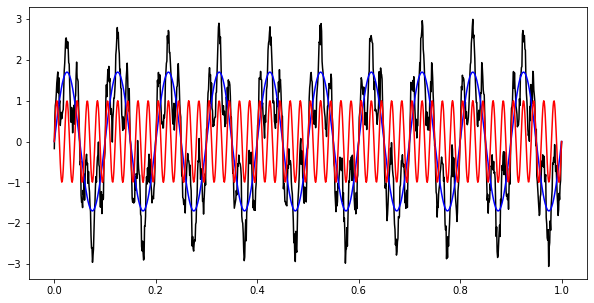

In [7]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F_23=1.7*np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 5))
plt.plot(t, F_23, 'k')
plt.plot(t, 1.7*np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r')
plt.show()

In [8]:
A, U, V = SSA_modes(F_23, 100)
print(A) # собственные числа
print(U) # собственные вектора
print(V) # траекторные вектора

[6.92635947e+04 6.56402942e+04 2.30450466e+04 2.18662546e+04
 6.64129706e+01 6.60112008e+01 6.07094158e+01 6.06123627e+01
 6.00684571e+01 5.93260794e+01 5.75675989e+01 5.74386032e+01
 5.60622022e+01 5.59356947e+01 5.42558258e+01 5.40159296e+01
 5.12776313e+01 5.09678480e+01 4.81679628e+01 4.79791225e+01
 4.65555029e+01 4.63467923e+01 4.55833402e+01 4.55352777e+01
 4.51834843e+01 4.47691153e+01 4.47339285e+01 4.47061756e+01
 4.45142500e+01 4.41604393e+01 4.34618249e+01 4.34322166e+01
 4.24025519e+01 4.21828808e+01 4.18821980e+01 4.17762909e+01
 4.15999573e+01 4.09301377e+01 4.05488428e+01 3.98560244e+01
 3.97212519e+01 3.96600037e+01 3.82369134e+01 3.80792896e+01
 3.76237870e+01 3.72729423e+01 3.72657444e+01 3.70075620e+01
 3.67951420e+01 3.65453226e+01 3.60639982e+01 3.59764039e+01
 3.57035893e+01 3.51573265e+01 3.49613590e+01 3.47966998e+01
 3.43489930e+01 3.41158570e+01 3.37851229e+01 3.37225663e+01
 3.33448724e+01 3.31279780e+01 3.30730030e+01 3.27291551e+01
 3.26222178e+01 3.243179

In [9]:
F1 = SSA_group(A, U, V, len(F_23), [0, 1, 2, 3, 4, 5, 6])
print(F1)

[ 0.00964906  0.41365029  0.75254821 ... -0.65604556 -0.21732775
  0.17320576]


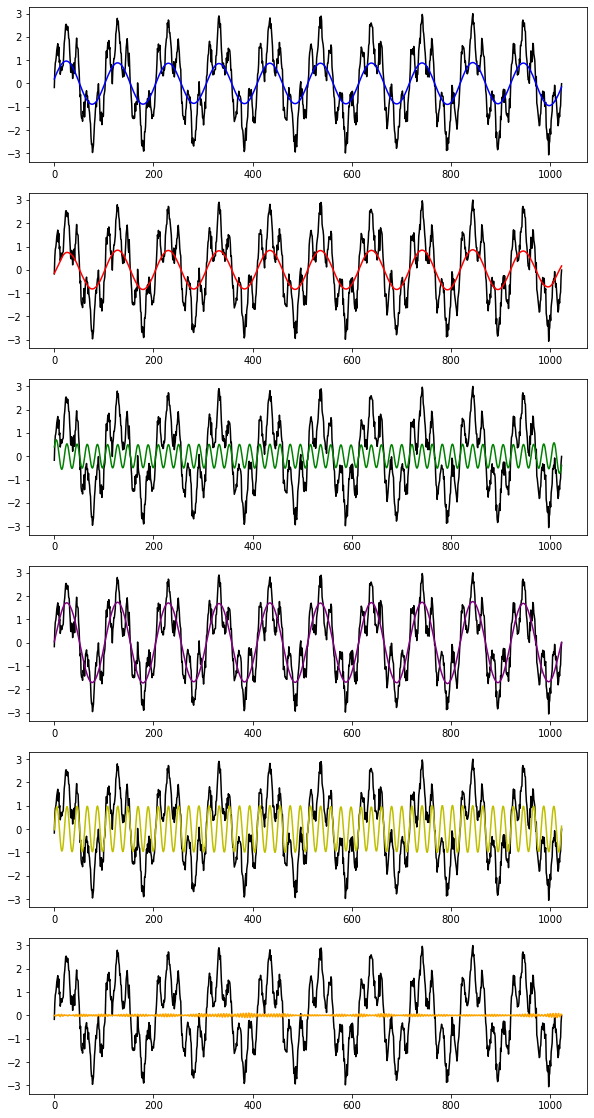

In [10]:
plt.figure(figsize = (10, 20))

F1_0 = SSA_group(A, U, V, len(F_23), [0])
plt.subplot(6,1,1)
plt.plot(F_23, 'k')
plt.plot(F1_0, 'b')
 
F1_1 = SSA_group(A, U, V, len(F_23), [1])
plt.subplot(6,1,2)
plt.plot(F_23, 'k')
plt.plot(F1_1, 'r')
 
F1_2 = SSA_group(A, U, V, len(F_23), [2])
plt.subplot(6,1,3)
plt.plot(F_23, 'k')
plt.plot(F1_2, 'g')
 

F1_01 = SSA_group(A, U, V, len(F_23), [0,1])
plt.subplot(6,1,4)
plt.plot(F_23, 'k')
plt.plot(F1_01, 'purple')
 

F1_02 = SSA_group(A, U, V, len(F_23), [2,3])
plt.subplot(6,1,5)
plt.plot(F_23, 'k')
plt.plot(F1_02, 'y')
 

F1_12 = SSA_group(A, U, V, len(F_23), [4,5,6])
plt.subplot(6,1,6)
plt.plot(F_23, 'k')
plt.plot(F1_12, 'orange')

plt.show()

F1_01 = SSA_group(A, U, V, len(F_23), [0,1]) - здесь видим гармонику 1.7*np.sin(2*np.pi*f1*t)
F1_02 = SSA_group(A, U, V, len(F_23), [2,3]) - здесь видим гармонику np.sin(2*np.pi*f2*t)

[0] - тренд временного ряда

Теперь аналогичной методикой попытаемся построить тренд для
сильно зашумленного ВР

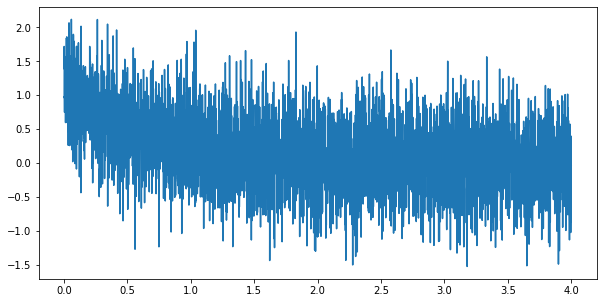

In [11]:
t = np.linspace(0,4,4096)
F = np.exp(-0.4*np.pi*t) + 0.5*rand.randn(len(t))

plt.figure(figsize = (10, 5))
plt.plot(t,F)
plt.show()

In [12]:
A, U, V = SSA_modes(F, 200)

In [13]:
F1 = SSA_group(A, U, V, len(F), [0, 1, 2,3,4,5,6])
print(F1)

print(len(F1))

[1.01124428 1.10092837 1.13139132 ... 0.15759178 0.23842253 0.07636168]
4096


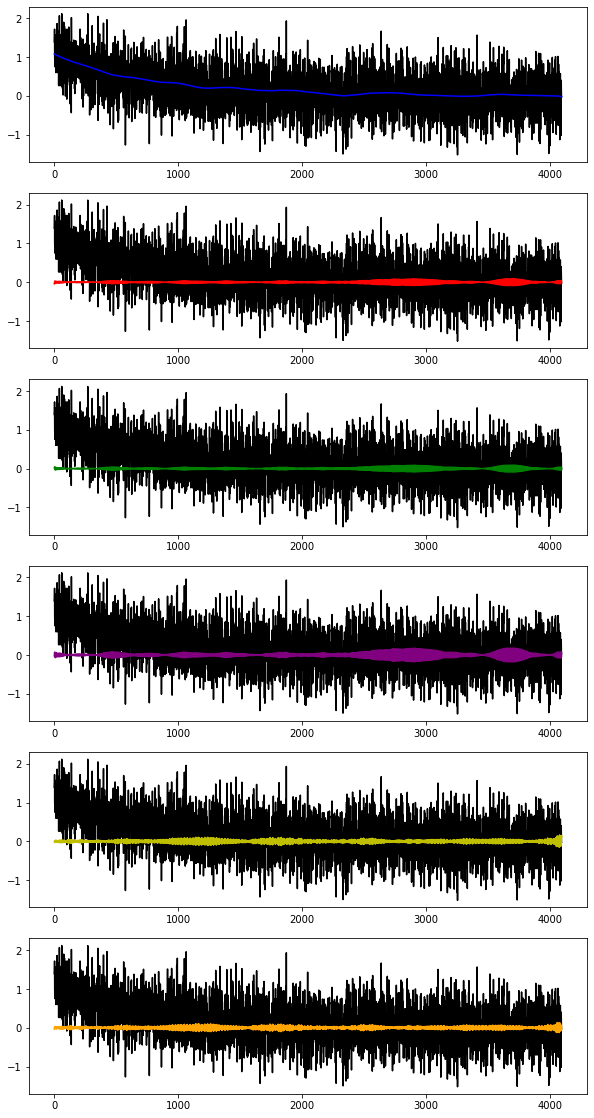

In [14]:
plt.figure(figsize = (10, 20))

F1_0 = SSA_group(A, U, V, len(F), [0])
plt.subplot(6,1,1)
plt.plot(F, 'k')
plt.plot(F1_0, 'b')
 
F1_1 = SSA_group(A, U, V, len(F), [1])
plt.subplot(6,1,2)
plt.plot(F, 'k')
plt.plot(F1_1, 'r')
 
F1_2 = SSA_group(A, U, V, len(F), [2])
plt.subplot(6,1,3)
plt.plot(F, 'k')
plt.plot(F1_2, 'g')
 

F1_01 = SSA_group(A, U, V, len(F), [1,2])
plt.subplot(6,1,4)
plt.plot(F, 'k')
plt.plot(F1_01, 'purple')
 

F1_02 = SSA_group(A, U, V, len(F), [3,4])
plt.subplot(6,1,5)
plt.plot(F, 'k')
plt.plot(F1_02, 'y')
 

F1_12 = SSA_group(A, U, V, len(F), [5,6])
plt.subplot(6,1,6)
plt.plot(F, 'k')
plt.plot(F1_12, 'orange')

plt.show()

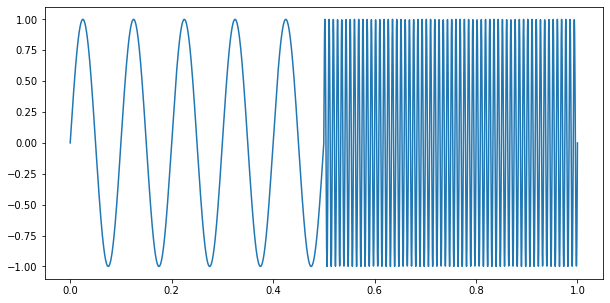

In [16]:
t = np.linspace(0, 1, 4096)
x2 = np.zeros(4096)
for i in range(0, len(t)//2):
    x2[i] = np.sin(2*np.pi*10*t[i])
for i in range(len(t)//2, len(t)):
    x2[i] = np.sin(2*np.pi*120*t[i])
plt.figure(figsize = (10, 5))
plt.plot(t, x2)
plt.show()

In [17]:
A, U, V = SSA_modes(x2, 100)

In [18]:
F1 = SSA_group(A, U, V, len(x2), [0, 1, 2,3,4,5,6])
print(F1)

[-0.00045534  0.01491242  0.03028308 ... -0.35829122 -0.18154533
  0.00133344]


C помощью метода SSA выделим компоненты, наиболее близкие к исходным периодикам на двух половинках временного интервала в модельном ряде

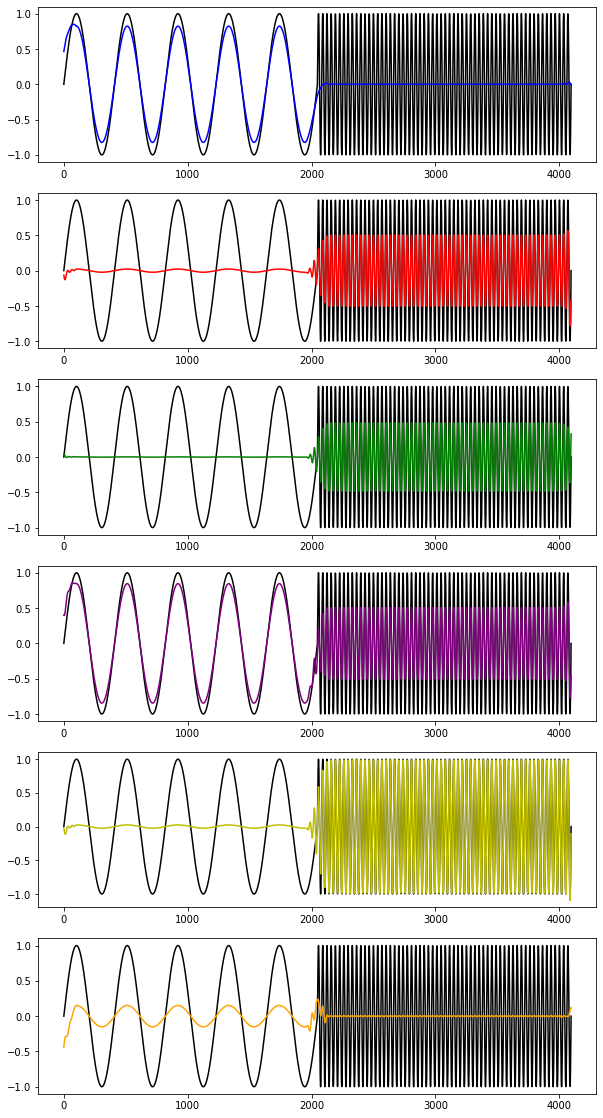

In [19]:
plt.figure(figsize = (10, 20))

F1_0 = SSA_group(A, U, V, len(x2), [0])
plt.subplot(6,1,1)
plt.plot(x2, 'k')
plt.plot(F1_0, 'b')
 
F1_1 = SSA_group(A, U, V, len(x2), [1])
plt.subplot(6,1,2)
plt.plot(x2, 'k')
plt.plot(F1_1, 'r')
 
F1_2 = SSA_group(A, U, V, len(x2), [2])
plt.subplot(6,1,3)
plt.plot(x2, 'k')
plt.plot(F1_2, 'g')
 

F1_01 = SSA_group(A, U, V, len(x2), [0,1])
plt.subplot(6,1,4)
plt.plot(x2, 'k')
plt.plot(F1_01, 'purple')
 

F1_02 = SSA_group(A, U, V, len(x2), [1,2])
plt.subplot(6,1,5)
plt.plot(x2, 'k')
plt.plot(F1_02, 'y')
 

F1_12 = SSA_group(A, U, V, len(x2), [3,4])
plt.subplot(6,1,6)
plt.plot(x2, 'k')
plt.plot(F1_12, 'orange')

plt.show()

 [0] - представляет первую половинку, [1,2] - вторую половинку

Смоделируем временной ряд из 4 гармоник с шумом, и разделим его на компоненты с помощью метода SSA

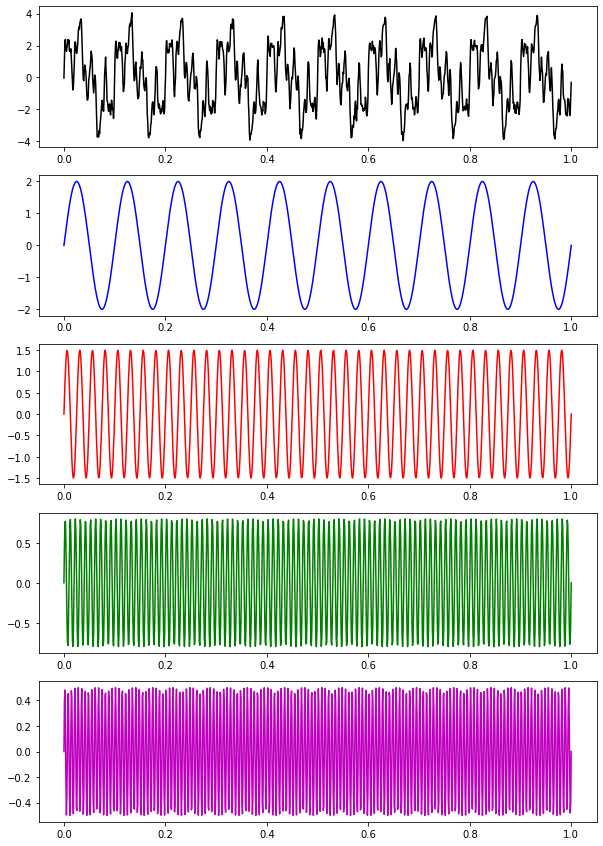

In [20]:
t = np.linspace(0,1,1024)
f1 = 10
f2 = 40
f3 = 100
f4 = 150
F_30=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi*f3*t)+0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 15))
plt.subplot(5,1,1)
plt.plot(t, F_30, 'k')
plt.subplot(5,1,2)
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b')
plt.subplot(5,1,3)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r')
plt.subplot(5,1,4)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.subplot(5,1,5)
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm')
plt.show()

In [21]:
A, U, V = SSA_modes(F_30, 100)

In [22]:
F1 = SSA_group(A, U, V, len(F_30), [0, 1, 2,3,4,5,6,7,8])
print(F1)

[ 0.06192833  1.32537858  2.23211009 ... -2.23767989 -1.3733796
 -0.01136621]


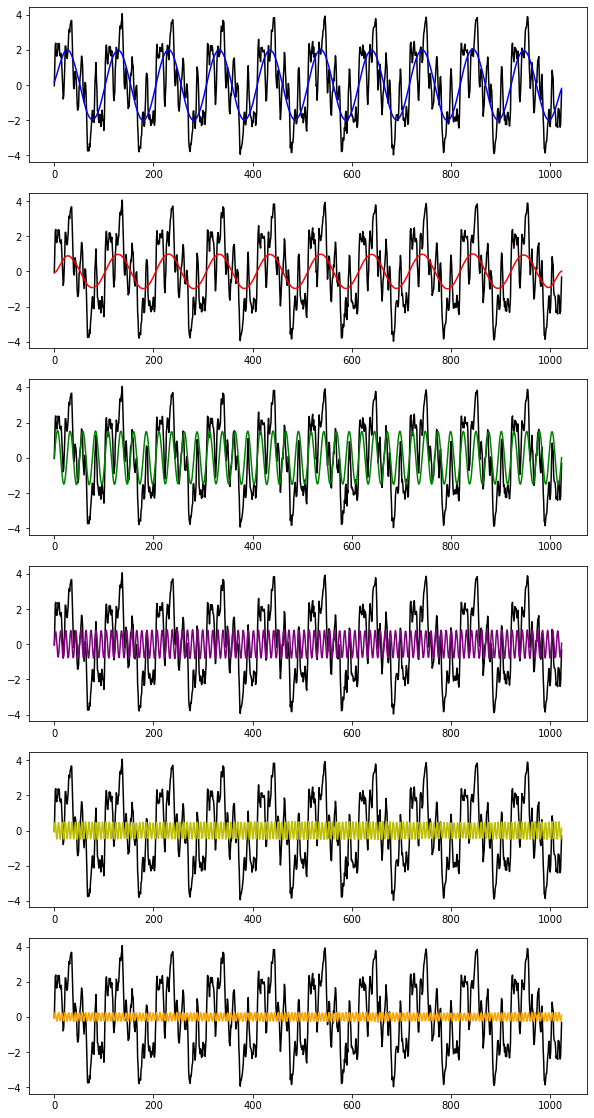

In [23]:
plt.figure(figsize = (10, 20))

F1_0 = SSA_group(A, U, V, len(F_30), [0,1])
plt.subplot(6,1,1)
plt.plot(F_30, 'k')
plt.plot(F1_0, 'b')
 
F1_1 = SSA_group(A, U, V, len(F_30), [1])
plt.subplot(6,1,2)
plt.plot(F_30, 'k')
plt.plot(F1_1, 'r')
 
F1_2 = SSA_group(A, U, V, len(F_30), [2,3])
plt.subplot(6,1,3)
plt.plot(F_30, 'k')
plt.plot(F1_2, 'g')
 

F1_01 = SSA_group(A, U, V, len(F_30), [4,5])
plt.subplot(6,1,4)
plt.plot(F_30, 'k')
plt.plot(F1_01, 'purple')
 

F1_02 = SSA_group(A, U, V, len(F_30), [6,7])
plt.subplot(6,1,5)
plt.plot(F_30, 'k')
plt.plot(F1_02, 'y')
 

F1_12 = SSA_group(A, U, V, len(F_30), [7,8])
plt.subplot(6,1,6)
plt.plot(F_30, 'k')
plt.plot(F1_12, 'orange')

plt.show()

[0,1] - первая гармоника, [2,3] - вторая, [4,5] - третья, [6,7] - четвертая

In [24]:
def SSA_R(F, L, I, M):
    N = len(F)
    A, U, V = SSA_modes(F, L)
    G = SSA_group(A, U, V, N, I)
    
    Q = np.zeros(N + M) # Увеличиваем матрицу Q на M прогнозируемых точек
    
    vu = np.linalg.norm(U[-1, I])
    R = np.sum(U[L - 1, I] * U[0:L - 1, I], 1)
    R = R / (1 - vu * vu)
    
    for i in range(0, N):
        Q[i] = G[i]
        
    for i in range(N, N + M - 1):
        A=0
        for j in range(0, L-2):
            A += R[j]*Q[i-j-1] 
        Q[i] = A                   
    
    return Q

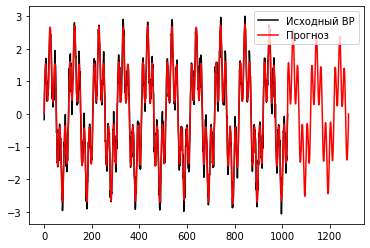

In [25]:
Q = SSA_R(F_23, 100, [0,1,2,3], 256) # прогноз методом SSA-R для ряда из п.23
plt.plot(F_23,'k',label='Исходный ВР')
plt.plot(Q, 'r',label='Прогноз')
plt.legend()
plt.show()

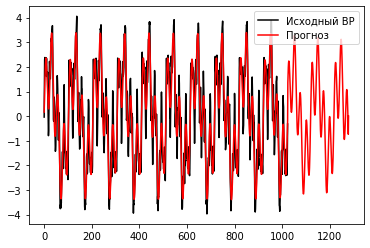

In [26]:
Q = SSA_R(F_30, 100, [0,1,2,3], 256)# прогноз методом SSA-R для ряда из п.30
plt.plot(F_30,'k',label='Исходный ВР')
plt.plot(Q, 'r',label='Прогноз')
plt.legend()
plt.show()

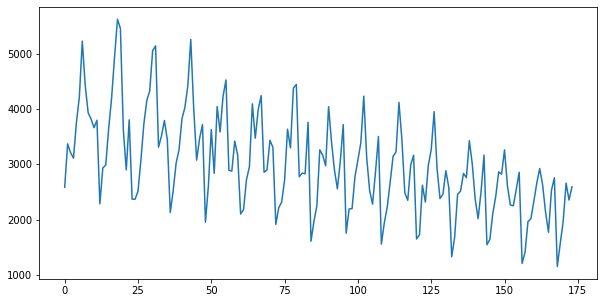

In [28]:
file = h5py.File('./files/Fort.mat','r')
data = file.get('Fort')
fort = np.array(data)
F_fort = np.ravel(fort)
plt.figure(figsize = (10, 5))
plt.plot(F_fort)
plt.show()

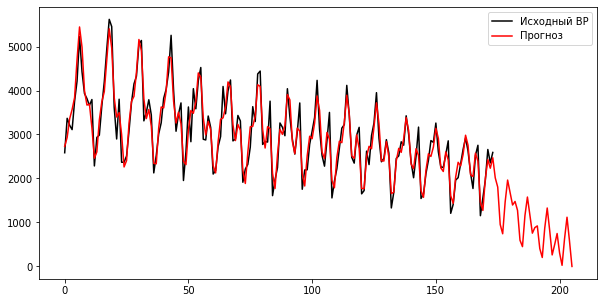

In [29]:
Q = SSA_R(F_fort, 20, [0,1,2,3,4,5], 32)# прогноз методом SSA-R для ряда Fort
plt.figure(figsize = (10, 5))
plt.plot(F_fort,'k', label='Исходный ВР')
plt.plot(Q, 'r', label='Прогноз')
plt.legend()
plt.show()

к пункту 47

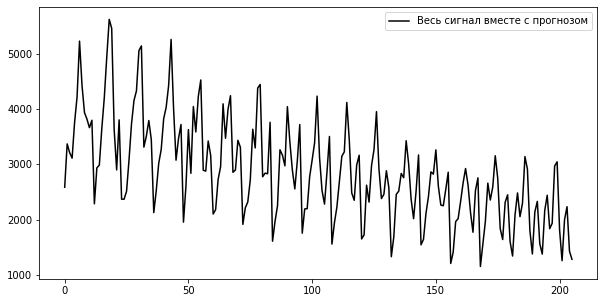

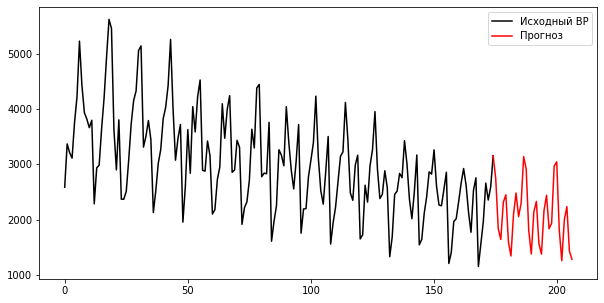

In [30]:
lin = len(F_fort) # длина исходного временного ряда

M = 32 # количество прогнозируемых отсчетов
L = 20 # длина окна разложения
I = [0,1,2,3,4,5] # массив группировки компонент
eps = 0.1 # некое эпсилон - наше допущение: 
          # насколько прогнозируемая точка далека от нужной

for i in range (M): # обработка по одной отчке
    f_new = np.random.choice(F_fort) # выбор случайной точки
    while True:
        F2 = np.append(F_fort, f_new) # добавление случайной точки к ряду
        A, U, V = SSA_modes(F2,L) #  Разложение нового ряда
        G = SSA_group(A, U, V, len(F2), I) # сгруппируем ряд обратно
        if (np.abs(f_new-G[len(G)-1]) < eps): # цикл завершится как только мы достигнем уровня допущения
            break
        f_new = G[len(G)-1]
    F_fort = F2
     
plt.figure(figsize = (10, 5))
plt.plot(F_fort,'k', label='Весь сигнал вместе с прогнозом')
plt.legend()

t_prognoz = np.linspace(lin,len(F_fort),M) # сформируем прогнозируемое время
plt.figure(figsize = (10, 5))
plt.plot(F_fort[:lin+1],'k', label='Исходный ВР')
plt.plot(t_prognoz, F_fort[lin:], 'r', label='Прогноз')
plt.legend()
plt.show()